# Inversion & Optimisation - assessment 1, part I

This first part covers lectures 1-7 and is worth a total of 75 marks. It is divided in 4 sections A-D.

## Section A - Row Echelon Form, Nullspace and Minimum Norm Solution [15 marks]
Consider the following matrix

$$
\underline{\mathbf A} =
\begin{pmatrix}
  2  & -1 & 0 & 0 & 0 \\
  -4 & 3 & 2 & 0 & 0 \\
  7 & -4 & 1 & 2 & 4 \\
  5 & -3 & -2 & -1 & -2 \\
\end{pmatrix}
$$

* Work out its Row Echelon Form
* Using this result, determine the rank of the matrix and the dimension of its nullspace. Which of the following terms applies to this matrix (or a linear system of equations based on it)? Give all terms that apply and explain why.
  - under-determined
  - equi-determined
  - over-determined
  - mixed-determined
  - full-rank
  - singular
  - rank-deficient
* Give a (linearly-independent) basis for the nullspace of the matrix
* You are given the exact solution $\boldsymbol{x}=(0,0,0,0,31)$ for the linear systems $\underline{\mathbf A}\boldsymbol{x} = \boldsymbol{b}$ with right-hand side vector $\boldsymbol{b}=(0,  0, 124, -62)$. Using the nullspace vectors, find the minimum norm (norm of $\boldsymbol{x}$) solution to the same equation (with the same right-hand side). Use a different method to find the same minimum-norm solution for this case (you may use any scipy routine for this) and check that the answer is the same. Explain why this method also provides the same answer.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.optimize as sop
from pprint import pprint

## Solution A.1

![jupyter](./A.1.jpg)

With some straightforward row operations, the **Row Echelon Form(REF)** should be:

$$
\begin{pmatrix}
2 & -1 & 0 & 0 & 0 \\
0 & 1 & 2 & 0 & 0 \\
0 & 0 & 1 & 1 & 2 \\
0 & 0 & 0 & 0 & 0 \\
\end{pmatrix}
$$



## Solution A.2
This is formed of three linearly independent rows (and equivalently of only two independent columns) so **its rank is 3**, i.e. **$rank(\underline{\mathbf A})=3$**. 

This is less that the minimum of $m$ and $n$ and so the matrix is **not full rank**.

By the rank-nullity theorem **the dimension of the null space is $5-3$, i.e. 2**.

From the matrix given above, the number of rows is 4 and the number of columns is 5, so $m=4$ and $n=5$.

Since $m\lt n$, the linear system of equations is **under-determined** and is not over-determined and equi-determined.

Since $rank(\underline{\mathbf A}) \lt \min(m, n)$, the linear system of equations is **rank-deficient**.

Since the matrix is not full-rank and rank-deficient, it is **mixed-determined**.

Since the matrix is not a square matrix, we don't need to talk about the singularity and it is not singular.

## Solution A.3
Consider the augmented matrix representing four linear equations in five unknowns (the RHS vector is all zero), i.e. the linear system $Ax=0$.

Any vector for which $2v_1 - v_2=0$, $v_2 + 2v_3 = 0$ and $v_3 + v_4 + 2v_5=0$
will be a solution of $A\boldsymbol{x} = \boldsymbol{0}$ 
and thus will lie in the null space of $A$.

If we chose arbitrary values for the variables, say $v_3 = \alpha$ and $v_4 = \beta$, then we obtain $v_1 = -\alpha$, $v_2=-2\alpha$ and $v_5=-\frac{1}{2}\alpha-\frac{1}{2}\beta$.

Therefore note that any vector $v$ in the null space can be written as

$$\boldsymbol{v} = \alpha 
\begin{pmatrix}
-1 \\
-2\\
1\\
0\\
-\frac{1}{2}
\end{pmatrix} 
+\beta
\begin{pmatrix}
0 \\
0\\
0\\
1\\
-\frac{1}{2}
\end{pmatrix} 
$$

That is, any vector in the null space of $A$ can be written as a linear combination of the two 
vectors above.  This null space is a two-dimensional plane within $\mathbb{R}^5$.
The null space thus  forms a sub-space of  $\mathbb{R}^5$.

In [2]:
A = np.array([
    [2., -1., 0, 0, 0],
    [0., 1., 2., 0, 0],
    [7., -4., 1., 2., 4.],
    [5., -3., -2., -1., -2.]])

print(np.linalg.matrix_rank(A))
null_vecs = sl.null_space(A)
print('nulls', null_vecs)

# null space vectors
n1 = np.array([-1,-2,1,0, -0.5])
n2 = np.array([0,0,0,1,-0.5])
print(A@n1)
print(A@n2)
# the linear combination of n1 and n2
print(A@(2*n1+3*n2))

# a solution 
x = np.array([0,0,0,0,31.])

b = A@x
print(b)

3
nulls [[-4.01609664e-01  1.54179832e-17]
 [-8.03219329e-01  3.08359665e-17]
 [ 4.01609664e-01 -1.57698753e-17]
 [-8.03219329e-02 -8.94427191e-01]
 [-1.60643866e-01  4.47213595e-01]]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[  0.   0. 124. -62.]


From the Python code above, it is showed that the rank of matrix $A$ is indeed 3 and the basis of null space($n_1$ and $n_2$) is correct because the linear system $Ax=0$ exists all the time if the $x$ is the linear combination of $n_1$ and $n_2$.

## Solution A.4 
Now consider the problem $A\boldsymbol{x}=\boldsymbol{b}$ where

$$\boldsymbol{b} = \begin{pmatrix}
0 \\
0\\
124\\
-62
\end{pmatrix} $$

One particular solution to this linear system is 

$$\boldsymbol{x}_{\text{part}} = \begin{pmatrix}
0 \\
0\\
0 \\
0\\
31
\end{pmatrix} $$

We can add to this solution any vector from the null space and by linearity it will be another solution, e.g.

$$\boldsymbol{x} = \begin{pmatrix}
0 \\
0\\
0 \\
0\\
31
\end{pmatrix}
+
2
\begin{pmatrix}
-1 \\
-2\\
1\\
0\\
-\frac{1}{2}
\end{pmatrix} 
+3
\begin{pmatrix}
0 \\
0\\
0\\
1\\
-\frac{1}{2}
\end{pmatrix}
$$

So the presence of a null space leads to non-uniqueness of solutions.

In [3]:
# Solution1(pseudo inverse)
# add on a multiple of each of thse 
# and check it's still a solution
mult1 = 2.
mult2 = 3.

# get the pseudo inverse
A_i = np.linalg.pinv(A)
x_m = A_i@b

# null space vectors
n1 = np.array([-1.,-2.,1.,0,-0.5])
n2 = np.array([0,0,0,1.,-0.5])

# add the multiples
# and check it's still a solution or not
mult1 = 2.
mult2 = 3.

x_p = x_m + mult1*n1

print(np.allclose(b, A@x_p))

x_p = x_m + mult2*n2

print(np.allclose(b, A@x_p))

x_p = x_m + mult1*n1 + mult2*n2

print(np.allclose(b, A@x_p))

True
True
True


One way to explore all of 2D space is to construct a 2D plot - here I plot the norm of the $x$ solutions. I add a red star for this solution and note that this is the point of minimum norm.

[-2. -4.  2. 12. 24.]


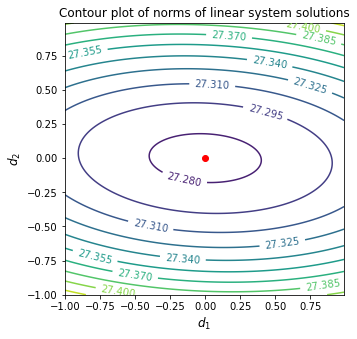

In [4]:
# Solution1(pseudo inverse)
A_i = np.linalg.pinv(A)
x_m = A_i@b
print(x_m)

# define a mesh of multipliers of the two null vectors
dm = 0.01
m1 = np.arange(-1.0, 1.0, dm)
m2 = np.arange(-1.0, 1.0, dm)
M1, M2 = np.meshgrid(m1, m2)

# compute the norms of the possible solutions 
norms = np.zeros_like(M1)
for i, m1i in enumerate(m1):
    for j, m2j in enumerate(m2):
        norms[i,j] = np.linalg.norm(x_m + m1i*n1 + m2j*n2)

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

cs = ax1.contour(M1, M2, norms, 10)
ax1.clabel(cs, inline=1, fontsize=10)
ax1.set_title('Contour plot of norms of linear system solutions')
ax1.set_xlabel('$d_1$', fontsize=12)
ax1.set_ylabel('$d_2$', fontsize=12)
# add a point at (0,0)
ax1.plot(0,0,'ro')

### Solution A.4.1 (the pseudo inverse)
From the plot above, we can see that by adding any vector from the null space, while still a solution to the problem, the norm of the solution will be larger.

Said another way, all the vectors considered above are solutions. **The one where the multipliers(mult1 and mult2) on the null space basis vectors are zero is the one that has the smallest norm.** So we can find the minimum norm (norm of $x$) solution using the **pseudo inverse**.

### Solution A.4.2 (Newton's method)-part1

The solution of the linear system could be written as:

$$\boldsymbol{x} = \begin{pmatrix}
0 \\
0\\
0 \\
0\\
31
\end{pmatrix}
+
\alpha
\begin{pmatrix}
-1 \\
-2\\
1\\
0\\
-\frac{1}{2}
\end{pmatrix} 
+
\beta
\begin{pmatrix}
0 \\
0\\
0\\
1\\
-\frac{1}{2}
\end{pmatrix}
$$

So actually, the aim of finding the smallest norm is to find a set of $\alpha$ and $\beta$ which makes the norm smallest. The solution of the linear system could be written as:

$$\boldsymbol{x} = \begin{pmatrix}
-2\alpha \\
-4\beta\\
2\alpha \\
2\beta\\
-\alpha-\beta+31
\end{pmatrix}
$$

We can get a norm fuction of $\alpha$ and $\beta$:

$$
  f(x, y) = 25x^2 + 5y^2 + 2xy - 62x - 62y + 961,
$$

This is a multi-dimension optimazation problem, so we can use Newton's method to find the stationary point. So we need to calculate the first order derivative and its second order derivative.

The first order of the function could be written as:

$$
f'(x,y) = \begin{pmatrix}
50x + 2y - 62 \\
10y + 2x -62
\end{pmatrix}
$$

The second order of the function could be written as:

$$
f''(x,y) = \begin{pmatrix}
50 & 2 \\
10 & 2
\end{pmatrix}
$$

And then, we can use the function from scipy.optimize to get the $x$ and $y$ which is the stationary point.

In [5]:
def f(X):
    x,y = X
    return 25*x**2 + 5*y**2 + 2*x*y - 62*x - 62*y + 961
def F(X):
    x,y = X
    return np.array([50*x+2*y-62, 10*y+2*x-62])
def dFdx(X):
    x,y = X
    return np.array([[50,2],[10,2]])

In [6]:
import scipy.optimize as sop
x0 = [0., 0.]
result = sop.minimize(f, x0, jac=F, hess=dFdx, method='trust-ncg')
print('Succesful: ', result['success'])
print('N/o iterations: ', result['nit'])
print('Minimum at: ', result['x'])

Succesful:  True
N/o iterations:  30
Minimum at:  [0.99999912 5.99999476]


### Solution 2(Newton's method)-part2

From the result showed above, we can find that when $x=1$ and $y=6$, we could get the local minimum of the norm function. What's more, the norm function is convex, so the local minimum/stationary point is the global minimum. So we get the same solution which gets the smallest norm. The solution is:

$$
x = \begin{pmatrix}
-2 \\
-4 \\
2 \\
12 \\
24
\end{pmatrix}
$$

which is same to the solution using the pseudo inverse. Therefore, both the pseudo inverse method and the Newton's method can find the same minimum-norm solution.

## Section B - Krylov Subspaces [15 marks]

Consider the linear system $\underline{\mathbf A}{\bf x}={\bf b}$ based on the matrix

$$
\underline{\mathbf A} = \begin{pmatrix}
2 & 0 & 1 \\ 0 & 4 & 0 \\ 1 & 0 &2
\end{pmatrix}
$$

* Using an initial guess of ${\bf x_0} = (0,0,0)$, give a (linearly independent) basis for the Krylov subspaces $\mathcal{D}_0, \mathcal{D}_1,$ and $\mathcal{D}_2$ for the following cases:
   - a right-hand side vector ${\bf b} = (1, 0, 0)$
   - a right-hand side vector ${\bf b} = (1, 1, 0)$
   - a right-hand side vector ${\bf b} = (0, 1, 0)$
* Based on the previous answer, predict how many iterations the Conjugate Gradient algorithm and the GMRES algorithm will take to solve the system $\underline{\mathbf A}{\bf x}={\bf b}$ with initial guess ${\bf x_0} = (0,0,0)$ for each of the cases.
* For the case ${\bf b} = (1, 0, 0)$ compute what the iterative approximations ${\bf x}^{i}$ are for $i=1, \dots, n$, where $n$ is the number of iterations you have predicted in the previous question, using the Conjugate Gradient Algorithm. Work these out yourself (in code or by hand), do not use an existing CG implementation here.
* For the case ${\bf b} = (1, 0, 0)$ compute what the iterative approximations ${\bf x}^{i}$ are for $i=1, \dots, n$, where $n$ is the number of iterations you have predicted, using the GMRES Algorithm. Work these out yourself (in code or by hand), do not use an existing GMRES implementation here.

## Solution B.1
$\DeclareMathOperator\span{span}$
By definition there are
\begin{align*}
  \mathcal{D}_0 &=
\operatorname{span}\{{\bf r}^{(0)}\}, \\
  \mathcal{D}_1 &=
\operatorname{span}\{{\bf r}^{(0)}, \underline{\mathbf A}{\bf r}^{(0)}\} \\
  \mathcal{D}_2 &=
\operatorname{span}\{{\bf r}^{(0)}, \underline{\mathbf A}{\bf r}^{(0)}, \underline{\mathbf A}^2{\bf r}^{(0)}\}
\end{align*}
Working out these vectors:

In [7]:
# the first RHS vector
A = np.array([[2,0,1],[0,4,0],[1,0,2]])
b1 = np.array([1,0,0])
x0 = np.array([0,0,0])

r0 = b1 - A @ x0
print("r0 = ", r0)
print("A r0 = ", A @ r0)
print("A^2 r0 = ", A @ A @ r0)

r0 =  [1 0 0]
A r0 =  [2 0 1]
A^2 r0 =  [5 0 4]


For the case ${\bf b} = (1, 0, 0)$, we can get the Krylov subspaces 
\begin{align*}
  \mathcal{D}_0 &= \{{[1,0,0]^\mathrm{T}}\}, \\
  \mathcal{D}_1 &= \{{[1,0,0]}^\mathrm{T}, [2,0,1]^\mathrm{T}\}, \\
  \mathcal{D}_2 &= \{{[1,0,0]}^\mathrm{T}, [2,0,1]^\mathrm{T}, [5,0,4]^\mathrm{T}\}
\end{align*}

In [8]:
# the second RHS vector
A = np.array([[2,0,1],[0,4,0],[1,0,2]])
b2 = np.array([1,1,0])
x0 = np.array([0,0,0])

r0 = b2 - A @ x0
print("r0 = ", r0)
print("A r0 = ", A @ r0)
print("A^2 r0 = ", A @ A @ r0)

r0 =  [1 1 0]
A r0 =  [2 4 1]
A^2 r0 =  [ 5 16  4]


For the case ${\bf b} = (1, 1, 0)$, we can get the Krylov subspaces 
\begin{align*}
  \mathcal{D}_0 &= \{{[1,1,0]^\mathrm{T}}\}, \\
  \mathcal{D}_1 &= \{{[1,1,0]}^\mathrm{T}, [2,4,1]^\mathrm{T}\}, \\
  \mathcal{D}_2 &= \{{[1,1,0]}^\mathrm{T}, [2,4,1]^\mathrm{T}, [5,16,4]^\mathrm{T}\}
\end{align*}

In [9]:
# the third RHS vector
A = np.array([[2,0,1],[0,4,0],[1,0,2]])
b3 = np.array([0,1,0])
x0 = np.array([0,0,0])

r0 = b3 - A @ x0
print("r0 = ", r0)
print("A r0 = ", A @ r0)
print("A^2 r0 = ", A @ A @ r0)

r0 =  [0 1 0]
A r0 =  [0 4 0]
A^2 r0 =  [ 0 16  0]


For the case ${\bf b} = (0, 1, 0)$, we can get the Krylov subspaces 
\begin{align*}
  \mathcal{D}_0 &= \{{[0,1,0]^\mathrm{T}}\}, \\
  \mathcal{D}_1 &= \{{[0,1,0]}^\mathrm{T}, [0,4,0]^\mathrm{T}\}, \\
  \mathcal{D}_2 &= \{{[0,1,0]}^\mathrm{T}, [0,4,0]^\mathrm{T}, [0,16,0]^\mathrm{T}\}
\end{align*}

## Solution B.2

We can use the simple counter object to record the number of calling, and then we can get the iterations of the GMRES algorithm and the CG algorithm for each case(with different RHS vectors).

In [10]:
import scipy.sparse.linalg as spl
class SimpleCounter:
    """Simple counter object that records how many times it has been called"""
    def __init__(self):
        self.count = 0
    
    def __call__(self, *args):
        """Counts each call, ignore any arguments"""
        self.count += 1

for k in range(4):
    ctr = SimpleCounter()
    xk, info = spl.gmres(A, b1, x0=x0, maxiter=k, callback=ctr, callback_type='legacy')
    assert info>=0, "Something went wrong in gmres"
    print(f"After k={ctr.count} iterations, x^k = {xk}, x^k - x0 = {xk-x0}")

    
print()

for g in range(4):
    ctr = SimpleCounter()
    xg, info = spl.cg(A, b1, x0=x0, maxiter=g, callback=ctr)
    assert info>=0, "Something went wrong in cg"
    print(f"After g={ctr.count} iterations, x^g = {xg}, x^g - x0 = {xk-x0}")

After k=0 iterations, x^k = [0. 0. 0.], x^k - x0 = [0. 0. 0.]
After k=1 iterations, x^k = [0. 0. 0.], x^k - x0 = [0. 0. 0.]
After k=2 iterations, x^k = [ 0.66666667  0.         -0.33333333], x^k - x0 = [ 0.66666667  0.         -0.33333333]
After k=2 iterations, x^k = [ 0.66666667  0.         -0.33333333], x^k - x0 = [ 0.66666667  0.         -0.33333333]

After g=3 iterations, x^g = [ 0.66666667  0.         -0.33333333], x^g - x0 = [ 0.66666667  0.         -0.33333333]
After g=1 iterations, x^g = [0.5 0.  0. ], x^g - x0 = [ 0.66666667  0.         -0.33333333]
After g=2 iterations, x^g = [ 0.66666667  0.         -0.33333333], x^g - x0 = [ 0.66666667  0.         -0.33333333]
After g=2 iterations, x^g = [ 0.66666667  0.         -0.33333333], x^g - x0 = [ 0.66666667  0.         -0.33333333]


For the case that the right-hand side vector ${\bf b} = (1, 0, 0)$, we can see from B.1 that the vector $[5,0,4]^\mathrm{T}$ is a linear combination of the other two vectors $[2,0,1]^\mathrm{T}$ and $[1,0,0]^\mathrm{T}$, so the the Krylov subspace $\mathcal{D}_2$ could be reduced to its $\mathcal{D}_1$, and then the iterations should be 2.

From the output above, we can see that the iterations of the GMRES and the Conjugate Gradient algorithm is indeed 2.

In [11]:
class SimpleCounter:
    """Simple counter object that records how many times it has been called"""
    def __init__(self):
        self.count = 0
    
    def __call__(self, *args):
        """Counts each call, ignore any arguments"""
        self.count += 1

for k in range(4):
    ctr = SimpleCounter()
    xk, info = spl.gmres(A, b2, x0=x0, maxiter=k, callback=ctr, callback_type='legacy')
    assert info>=0, "Something went wrong in gmres"
    print(f"After k={ctr.count} iterations, x^k = {xk}, x^k - x0 = {xk-x0}")
    
print()

for g in range(4):
    ctr = SimpleCounter()
    xg, info = spl.cg(A, b2, x0=x0, maxiter=k, callback=ctr)
    assert info>=0, "Something went wrong in cg"
    print(f"After g={ctr.count} iterations, x^g = {xg}, x^g - x0 = {xk-x0}")

After k=0 iterations, x^k = [0. 0. 0.], x^k - x0 = [0. 0. 0.]
After k=1 iterations, x^k = [0. 0. 0.], x^k - x0 = [0. 0. 0.]
After k=2 iterations, x^k = [0. 0. 0.], x^k - x0 = [0. 0. 0.]
After k=3 iterations, x^k = [ 0.66666667  0.25       -0.33333333], x^k - x0 = [ 0.66666667  0.25       -0.33333333]

After g=3 iterations, x^g = [ 0.66666667  0.25       -0.33333333], x^g - x0 = [ 0.66666667  0.25       -0.33333333]
After g=3 iterations, x^g = [ 0.66666667  0.25       -0.33333333], x^g - x0 = [ 0.66666667  0.25       -0.33333333]
After g=3 iterations, x^g = [ 0.66666667  0.25       -0.33333333], x^g - x0 = [ 0.66666667  0.25       -0.33333333]
After g=3 iterations, x^g = [ 0.66666667  0.25       -0.33333333], x^g - x0 = [ 0.66666667  0.25       -0.33333333]


For the case that the right-hand side vector ${\bf b} = (1, 1, 0)$, we can see from B.1 that the vectors in the $\mathcal{D}_2$ are linearly independent, so the iterations should be 3.

From the output above, we can see that the iterations of the GMRES and the Conjugate Gradient algorithm is indeed 3.

In [12]:
class SimpleCounter:
    """Simple counter object that records how many times it has been called"""
    def __init__(self):
        self.count = 0
    
    def __call__(self, *args):
        """Counts each call, ignore any arguments"""
        self.count += 1

for k in range(4):
    ctr = SimpleCounter()
    xk, info = spl.gmres(A, b3, x0=x0, maxiter=k, callback=ctr, callback_type='legacy')
    assert info>=0, "Something went wrong in cg"
    print(f"After k={ctr.count} iterations, x^k = {xk}, x^k - x0 = {xk-x0}")
    
print()

for g in range(4):
    ctr = SimpleCounter()
    xg, info = spl.cg(A, b3, x0=x0, maxiter=k, callback=ctr)
    assert info>=0, "Something went wrong in gmres"
    print(f"After g={ctr.count} iterations, x^g = {xg}, x^g - x0 = {xk-x0}")

After k=0 iterations, x^k = [0. 0. 0.], x^k - x0 = [0. 0. 0.]
After k=1 iterations, x^k = [0.   0.25 0.  ], x^k - x0 = [0.   0.25 0.  ]
After k=1 iterations, x^k = [0.   0.25 0.  ], x^k - x0 = [0.   0.25 0.  ]
After k=1 iterations, x^k = [0.   0.25 0.  ], x^k - x0 = [0.   0.25 0.  ]

After g=1 iterations, x^g = [0.   0.25 0.  ], x^g - x0 = [0.   0.25 0.  ]
After g=1 iterations, x^g = [0.   0.25 0.  ], x^g - x0 = [0.   0.25 0.  ]
After g=1 iterations, x^g = [0.   0.25 0.  ], x^g - x0 = [0.   0.25 0.  ]
After g=1 iterations, x^g = [0.   0.25 0.  ], x^g - x0 = [0.   0.25 0.  ]


For the case that the right-hand side vector ${\bf b} = (0, 1, 0)$, we can see from B.1 that the $\mathcal{D}_2$ could be reduced to $\mathcal{D}_2 = \{[0,1,0]^\mathrm{T}\}$, so the iterations should be 1.

From the output above, we can see that the iterations of the GMRES and the Conjugate Gradient algorithm is indeed 1.

## Solution B.3

The implementation of the Conjugate Gradient algorithm is showned below.

In [13]:
x = np.array([0,0,0])
A = np.array([[2,0,1],[0,4,0],[1,0,2]])
b = np.array([1,0,0])
r=b-np.dot(A,x)
# p0=r0
p=r
for i in range(2):
    r1 = r
    alpha = np.dot(r.T,r)/np.dot(p.T,np.dot(A,p))
    # Update vector x: x(k+1)=x(k)+a(k)*p(k)
    x = x + alpha * p
    print("x^" + str(i + 1) + ":")
    print(x)
    # Update vector r: r(k+1)=b-A*x(k+1)
    r = b - np.dot(A,x)  
    q = np.linalg.norm(np.dot(A, x) - b) / np.linalg.norm(b)
    # the tol= 10**-6
    if q < 10**-6:
        break
    else:
        beta = np.linalg.norm(r)**2 / np.linalg.norm(r1)**2
        # Update vector p: p(k+1)=r(k+1)+beta(k)*p(k)
        p=r+beta*p  
# print(x)

x^1:
[0.5 0.  0. ]
x^2:
[ 0.66666667  0.         -0.33333333]


### Solution B.4

The implementation of the GMRES algorithm is showned below.

In [14]:
tol = 1e-8
# Computes a basis of the Krylov Subspace of A
# Q: The columns of an orthogonal basis of A's Krylov subspace.
# h: A on basis Q, It is an upper-Hessenber Matrix
def arnoldi_iter(A, b, N_iter):    
    """
    
        
    returns:
        
    """
    n = len(b)
    
    # Initializes the Matrices
    Q = np.zeros((n, N_iter + 1))
    h = np.zeros((N_iter + 1, N_iter))

    # the first
    q = b / np.linalg.norm(b)
    Q[:, [0]] = q

    for i in np.arange(N_iter):
        v = A @ q
        for j in np.arange(i + 1):
            # subtraction needs the same shape
            qj= Q[:, j].reshape(n, 1)
            h[j, i] = ( qj.conj() ).T @ v
            v = v - ( h[j, i] * qj)  
        h[i + 1, i] = np.linalg.norm(v)
        
        if (h[i + 1, i] > tol):
            q = v/h[i + 1, i]
            Q[:, [i + 1]] = q
            
        else:
            return Q,h
    return Q,h

In [15]:
def GMRES (A, b, N_iter, loop_i):
    n = len(b)
    x0 = np.zeros((n, 1))

    # Compute the residual
    r0 = b - (A @ x0)
    
    beta = np.linalg.norm(r0)
    
    for i in np.arange(1, (N_iter + 1)):
        tmp = np.zeros((i + 1 , 1))
        tmp[0] = 1
        # Arnoldi iterations
        Q, h = arnoldi_iter(A, r0, i)
        # Solve least square problem
        y = np.linalg.lstsq(h, beta*tmp, rcond=None)[0]
        
        if (i == loop_i):
             break
        
    # Form solution 
    x = x0 + np.matmul(Q[:,:-1], y )
    #convert to vector
    x_vec=x.ravel()
    return x_vec

In [16]:
A = np.array([[2,0,1],[0,4,0],[1,0,2]])
b = np.array([[1],[0],[0]])
x1 = GMRES(A, b, 100, 1)
x2 = GMRES(A, b, 100, 2)
print("x^1: ", x1)
print("x^2: ", x2)

x^1:  [0.4 0.  0. ]
x^2:  [ 0.66666667  0.         -0.33333333]


## Section C - Nonlinear Methods [20 marks]

In the lectures we have seen the Steepest or Gradient Descent algorithm for minimisation of a quadratic function $f$:

$$
  {\bf x}^{(i+1)} = {\bf x}^{(i)} - \alpha^{(i)} f'({\bf x}^{(i)})
$$

where $\alpha$ controls the step size, and we made the choice:

$$
  \alpha^{(i)} = \frac{{\bf r}^{(i)}\cdot {\bf r}^{(i)}}
  {{\bf r}^{(i)} \cdot\underline{\mathbf A} {\bf r}^{(i)}}
$$

with $\underline{\mathbf A}$ being the (constant) Hessian matrix of $f$, and ${\bf r}^{(i)}=-f'({\bf x}^{(i)})$.

For the minimisation of more general, nonlinear functions $f$ we need to consider a different formula for $\alpha$. One option is the Barzilai-Borwein formula:

$$
  \alpha^{(i)} = \frac{| \left({\bf x}^{(i)} - {\bf x}^{(i-1)}\right)\cdot \left(f'({\bf x}^{(i)}) - f'({\bf x}^{(i-1)})\right)|}
  {\|f'({\bf x}^{(i)}) - f'({\bf x}^{(i-1)})\|^2}
$$

Implement the Steepest Descent method with this choice for the step size and test it on the so called Rosenbrock function

$$
  f(x,y) = 100 (y-x^2)^2 + (1-x)^2
$$

Plot the convergence trajectory for a number of different initial guesses. Describe and try to explain what you observe. Compare the convergence with that of Newton's method (for this you may use any of the code in the lecture notes), no line search or trust region method is needed.

Note that the Barzilai-Borwein formula depends on the last two iterations. In the very first iteration you can just use a fixed value of $\alpha$ instead, say $\alpha^{(0)}=0.01$.

Hint: for the Rosenbrock function itself, and any of its derivatives you can use the implementation in scipy.optimize:

In [17]:
import scipy.optimize as sop
xy = [0,1]
print("f(x, y) =", sop.rosen(xy))
print("f'(x, y) =", sop.rosen_der(xy))
print("f''(x, y) =", sop.rosen_hess(xy))

f(x, y) = 101.0
f'(x, y) = [ -2 200]
f''(x, y) = [[-398    0]
 [   0  200]]


## Solution C.1



In [18]:
# The function of the Steepest Descent mathod with Barzilai-Borwein formula
import math
def Barzilai_Borwein(x0, atol = 1.e-15, maxiter=100):
    X = [x0]
    x = x0
    alpha = 0.01

    for i in range(maxiter + 1):
        
        if i > 0:
            alpha = abs((x - X[-2])@(sop.rosen_der(x)-sop.rosen_der(X[-2]))) / (np.linalg.norm((sop.rosen_der(x)-sop.rosen_der(X[-2])), 2))**2

        x = x - alpha*sop.rosen_der(x)
                
        X.append(x)

        if math.sqrt((x[0]-X[-2][0])**2+(x[1]-X[-2][1])**2) < atol:
            break
    
    return X

In [19]:
# the function of the Newton's method
def Newton_Method(x0, atol = 1.e-15, maxiter=100):
    X = [x0]
    x = x0
    for i in range(maxiter + 1):
        x = x + sl.solve(sop.rosen_hess(x), -sop.rosen_der(x))
        X.append(x)
        
        if math.sqrt((x[0]-X[-2][0])**2+(x[1]-X[-2][1])**2) < atol:
            break
    return X

In [20]:
x0 = [5,6]
atol = 1.0e-15
maxiter=100
print(Barzilai_Borwein(x0, atol, maxiter))
print()
print(Newton_Method(x0, atol, maxiter))

[[5, 6], array([-375.08,   44.  ]), array([ 4.94799141, 44.5065959 ]), array([ 4.94870504, 44.50652377]), array([ 8.27275229, 44.17060661]), array([ 6.04221086, 44.30539473]), array([ 6.46579303, 44.27032404]), array([ 6.68177055, 44.25359379]), array([ 6.65091347, 44.2558781 ]), array([ 6.65217429, 44.25575959]), array([ 6.6521809 , 44.25573523]), array([ 6.65217912, 44.25571149]), array([ 6.65216871, 44.25557311]), array([  -5.63266654, -119.18684709]), array([  20.9509746 , -116.82716506]), array([  -3.78183419, -116.23691574]), array([  -2.7757172 , -116.10390247]), array([  -0.46524126, -115.68773093]), array([-3.42128304e-02, -1.15224563e+02]), array([ 7.37318107e-05, -1.14724142e+02]), array([ 1.61306109e-05, -1.13768968e+02]), array([ 0.00634443, -0.02178657]), array([1.60040328e-02, 4.02594781e-05]), array([0.02589939, 0.0002575 ]), array([0.22833502, 0.00886515]), array([0.2072916 , 0.08446843]), array([0.22838479, 0.0496384 ]), array([0.23392076, 0.05176457]), array([0.24934

From the outputs showed above, we can see that these two iterative methods eventually converge at point (1,1) which means that the final solution of the system should be (1,1).

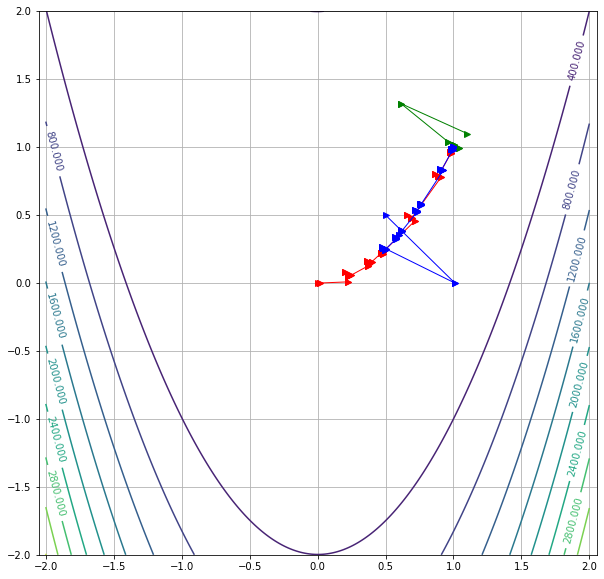

In [21]:
# initial guess
xy_init1 = np.array([0,0])

# calculate
path_b1 = Barzilai_Borwein(xy_init1)

xy_init2 = np.array([1.1,1.1])
path_b2 = Barzilai_Borwein(xy_init2)

xy_init3 = np.array([0.5,0.5])
path_b3 = Barzilai_Borwein(xy_init3)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.grid()
x = np.linspace(-2, 2, 300)
y = np.linspace(-2, 2, 300)
xy = np.array(np.meshgrid(x, y)).T
value = np.zeros((xy.shape[0],xy.shape[1]))
for i in range(xy.shape[0]):
    for j in range(xy.shape[1]):
        value[i,j] = sop.rosen(xy[i,j,:])
c = ax.contour(xy[:,:,0], xy[:,:,1], value, 10)
ax.clabel(c)
axis = ax.axis('equal')

# plot the path
for i in range(len(path_b1)-1):
    ax.plot((path_b1[i][0],path_b1[i+1][0]),(path_b1[i][1], path_b1[i+1][1]), marker='>',color='r',lw=1)
    
for i in range(len(path_b2)-1):
    ax.plot((path_b2[i][0],path_b2[i+1][0]),(path_b2[i][1], path_b2[i+1][1]), marker='>',color='g',lw=1)
    
for i in range(len(path_b3)-1):
    ax.plot((path_b3[i][0],path_b3[i+1][0]),(path_b3[i][1], path_b3[i+1][1]), marker='>',color='b',lw=1)

## Solution C.1

The red trajectory indicates the convergence trajectory for the initial guess=(0,0), the green one indicates that for the initial guess=(1.1,1.1) and the blue one is for the initial guess=(0.5,0.5).

From the figure of the convergence trajectory for a number of different initial guesses, we can see that the Steepest Descend method with the Barzilai-Borwein formula is **unstable**. Some steps could be very large and the phenomenon is independent to the distance between the initial point and the final point.

I guess the reason for it may be that in the Barzilai-Borwein formular ${\|f'({\bf x}^{(i)}) - f'({\bf x}^{(i-1)})\|^2}$ is much smaller than ${| \left({\bf x}^{(i)} - {\bf x}^{(i-1)}\right)\cdot \left(f'({\bf x}^{(i)}) - f'({\bf x}^{(i-1)})\right)|}$.

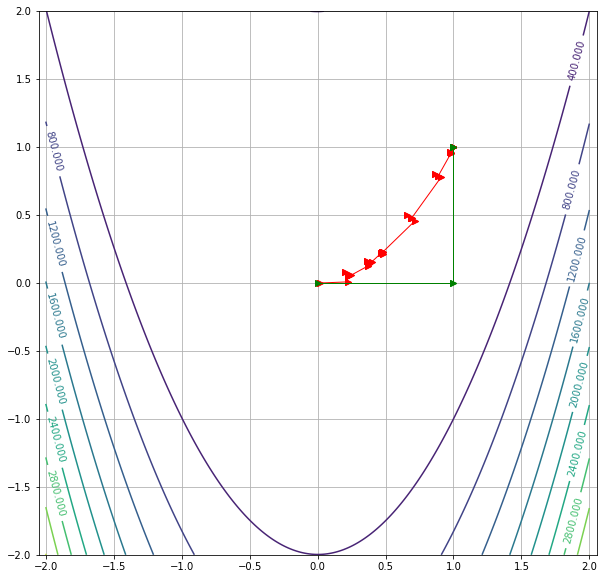

In [22]:
# initial guess
xy_init = np.array([0,0])
path_b_steepest = Barzilai_Borwein(xy_init)
path_b_newton = Newton_Method(xy_init, atol, maxiter)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.grid()
x = np.linspace(-2, 2, 300)
y = np.linspace(-2, 2, 300)
xy = np.array(np.meshgrid(x, y)).T
value = np.zeros((xy.shape[0],xy.shape[1]))
for i in range(xy.shape[0]):
    for j in range(xy.shape[1]):
        value[i,j] = sop.rosen(xy[i,j,:])
c = ax.contour(xy[:,:,0], xy[:,:,1], value, 10)
ax.clabel(c)
axis = ax.axis('equal')

# plot the path
for i in range(len(path_b_steepest)-1):
    ax.plot((path_b_steepest[i][0],path_b_steepest[i+1][0]),(path_b_steepest[i][1],path_b_steepest[i+1][1]), marker='>',color='r',lw=1)

for i in range(len(path_b_newton)-1):
    ax.plot((path_b_newton[i][0],path_b_newton[i+1][0]),(path_b_newton[i][1],path_b_newton[i+1][1]), marker='>',color='g',lw=1)


## Solution C.2

The red trajectory indicates the convergence trajectory for the Steepest Descend method with the Barzilai-Borwein formula, and the green one is for the Newton's method.

From the figure showed above, we can see that the Newton's method(only need 3 steps) is much faster because the Newton's mathod is second-ordered method while the Steepest Descent method is a first-ordered one. What's more, the Newton's method is much more stable. So we can say that the performance of the Newton's method is better than the Steepest Descend method.

## Section D - Image Smoothing [25 marks]

In lecture 3 we saw how a discrete Laplace operator can be used to smoothen/blur an image. We solve the following linear system:

$$
  \left[\underline{\mathbf I} + m \underline{\mathbf A}\right]
  \boldsymbol{u}_{\text{smooth}} = \boldsymbol{u}_{\text{orig}}
$$

where $\boldsymbol{u}_{\text{orig}}$ is the original image and $\boldsymbol{u}_{\text{smooth}}$ the smoothed image we solve for. $\underline{\mathbf I}$ is the identity matrix, $\underline{\mathbf A}$ is the discrete Laplace operator, and $m$ is a positive constant. The images $\boldsymbol{u}_{\text{orig}}$ and $\boldsymbol{u}_{\text{smooth}}$ are stored as flattened vectors, where an image of $N_y\times N_x$ is stored as single vector of length $n=N_yN_x$.

To read in the original image, you may use the following code:

In [23]:
import matplotlib.pyplot as plt
# reads in an image of Ny x Nx x 4
# where the last dimension represents three RGB colour channels and an alpha channel
img = plt.imread('london_road.png')

# convert to black and white, by averaging over the RGB channels (dropping the alpha channel)
img_bw = img[:,:,:3].sum(axis=-1)/3

# flatten into vector of length Nx*Ny
u_orig = img_bw.flatten()

print(img_bw.shape, u_orig.shape)

(674, 450) (303300,)


which we can display using

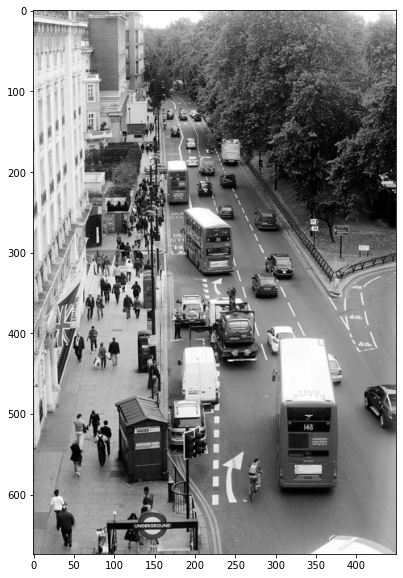

In [24]:
fig, ax = plt.subplots(1, figsize=(17,10))
ax.imshow(u_orig.reshape(img_bw.shape), cmap='gray');

The discrete Laplace operator matrix can be obtained from the following piece of code:

In [25]:
import numpy as np
import scipy.sparse as sp

def Laplace(Ny, Nx):
    """ Assembles a discrete Laplace operator with Neumann boundary conditions
    into a sparse matrix.
    """
    # construct matrix from 5 (off-)diagonals
    # we provide the diagonals as one 5 x n array
    # the actual off-diagonals should of course be shorter
    # but dia_matrix cuts them off for us
    n = Nx*Ny
    offsets = [-Nx, -1, 0, 1, Nx]
    diags = -np.ones((5,n))
    diags[2] = -diags[2]*4  # main diagonal should be positive and 4 times the off-diagonals
    A = sp.dia_matrix((diags, offsets), shape=(n,n)).tocsr()
    
    # grid point in the right-most column, should not be connected to
    # the grid point in the first column on the next row
    for i in range(1,Ny):
        A[i*Nx-1, i*Nx] = 0
        A[i*Nx, i*Nx-1] = 0
        
    # for homogenous Neumann boundary conditions all we have to do is
    # make sure that the diagonal is set such that the row sum is zero
    # This replaces some of the 4 values on the diagonal with the actual number
    # of connected grid points on the boundary:
    A.setdiag(A.diagonal() - np.array(A.sum(axis=1)).flatten())
    
    return A

A = Laplace(img_bw.shape[0], img_bw.shape[1])

* What are the properties of the matrix $\left[\underline{\mathbf I} + m \underline{\mathbf A}\right]$? Based on your answer choose an appropriate iterative solver and produce a smoothened image with $m=10$ using a solver from https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html

## Solution D.1
$$
  \left[\underline{\mathbf I} + m \underline{\mathbf A}\right]
  \boldsymbol{u}_{\text{smooth}} = \boldsymbol{u}_{\text{orig}}
$$

where $\underline{\mathbf A}$ is the discrete Laplace operator, and $m$ is a positive constant. The equation above could also be written as:


$$
\left(\underline{\mathbf I} + \tfrac 14 q \underline{\mathbf A}\right) \boldsymbol{u}_{\text{smooth}} = \boldsymbol{u}_{\text{orig}}
$$

where $q$ is defined as $q=4\Delta x/\Delta x^2$, so we could get the equation: $m=\frac{1}{4}q$


From the lecture notes we know the discrete Laplace operator $\underline{\mathbf A}$ is SPD for any positive $m$, so the matrix $mA$ should also be SPD. What's more, the matrix $I$ is also SPD, so the matrix $\left[\underline{\mathbf I} + m \underline{\mathbf A}\right]$ is SPD. Thus an appropriate iterative solver would be Conjugate Gradient method.

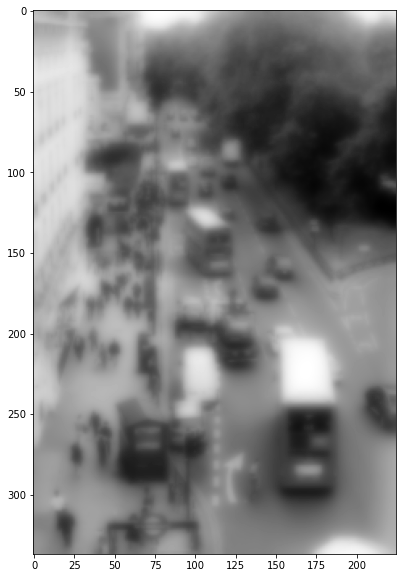

In [26]:
import matplotlib.pyplot as plt
import scipy.sparse.linalg as spl
# reads in an image of Ny x Nx x 3
# where the last dimension represent three RGB colour channels
img = plt.imread('london_road.png')

# make B&W
img_bw = img.sum(axis=-1)/3

# subsample
img_bw = img_bw[::2, ::2]

c = img_bw.flatten()

A = Laplace(img_bw.shape[0], img_bw.shape[1])

# smoothing matrix:
m = 10.
M = sp.eye(len(c)) + m * A

# let's keep track of the number of iterations:
class SimpleCounter:
    """Simple counter object that records how many times it has been called"""
    def __init__(self):
        self.count = 0
    
    def __call__(self, *args):
        """Counts each call, ignore any arguments"""
        self.count += 1


# example usage:
counter = SimpleCounter()

result = spl.cg(M, c, callback=counter)
result, counter.count

c = result[0]
fig, ax = plt.subplots(1, figsize=(17,10))
ax.imshow(c.reshape(img_bw.shape), cmap='gray')

We would now like to consider a spatially varying smoothing filter, where the amount of smoothing in each grid point is controlled by the entries in _vector_ $\bf m$ of length $n=NyNx$. We can do this by solving
$$
  \left[\underline{\mathbf I} + \operatorname{diag}(\bf m) \underline{\mathbf A}\right]
  \boldsymbol{u}_{\text{smooth}} = \boldsymbol{u}_{\text{orig}}
$$
where $\operatorname{diag}(\bf m)$ is the diagonal matrix with the entries of $\bf m$ on its main diagonal. Its role is to scale each row of $\underline{\mathbf A}$ with the corresponding value of $\bf m$.

An example for a spatially varying $\bf m$ is set up in the code below:

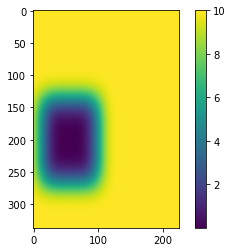

In [27]:
# set up x and y coordinate vectors for the grid
Ny, Nx = img_bw.shape
x, y = np.meshgrid(np.linspace(0,1,Nx), np.linspace(0,1,Ny))
x = x.flatten()
y = y.flatten()

# blur everywhere except for an area around (0.25,0.6)
m = (1-np.exp(-((y-0.6)**4 + (x-0.25)**4)*500))*10

# plot the values of the m vector
plt.imshow(m.reshape(img_bw.shape))
plt.colorbar();

* Assemble the matrix $\left[\underline{\mathbf I} + \operatorname{diag}(\bf m) \underline{\mathbf A}\right]$ (hint you may find [scipy.sparse.diags](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html) useful) and investigate its properties. Solve the linear system using an iterative solver from scipy.sparse.linalg and show the resulting image.

## Solution D.2



In [28]:
from scipy.sparse import diags
print(m)
print(diags(m.flatten(),0).data)

[10. 10. 10. ... 10. 10. 10.]
[[10. 10. 10. ... 10. 10. 10.]]


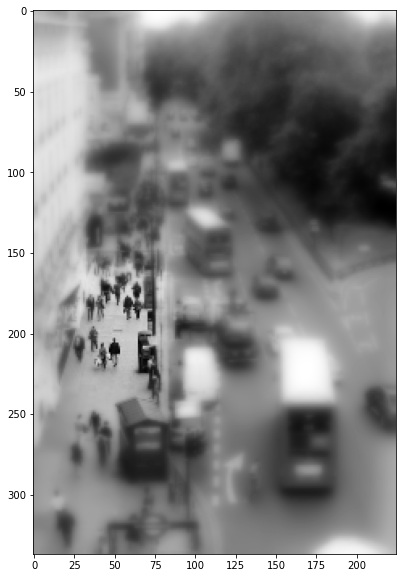

In [29]:
from scipy.sparse import diags
import matplotlib.pyplot as plt
import scipy.sparse.linalg as spl
# reads in an image of Ny x Nx x 3
# where the last dimension represent three RGB colour channels
img = plt.imread('london_road.png')

# make B&W
img_bw = img.sum(axis=-1)/3

# subsample
img_bw = img_bw[::2, ::2]

c = img_bw.flatten()

A = Laplace(img_bw.shape[0], img_bw.shape[1])

# smoothing matrix:
# m = 10.
M = sp.eye(len(c)) + diags(m) @ A

# let's keep track of the number of iterations:
class SimpleCounter:
    """Simple counter object that records how many times it has been called"""
    def __init__(self):
        self.count = 0
    
    def __call__(self, *args):
        """Counts each call, ignore any arguments"""
        self.count += 1


# example usage:
counter = SimpleCounter()

result = spl.cg(M, c, callback=counter)
result, counter.count

c = result[0]
fig, ax = plt.subplots(1, figsize=(17,10))
ax.imshow(c.reshape(img_bw.shape), cmap='gray')

### Solution D.2

$\left[\underline{\mathbf I} + \operatorname{diag}(\bf m) \underline{\mathbf A}\right]$ should be symmetrix positive-definite matrix(SPD).

From the figure above, we can find that the value of $m$ inside the rectangle is larger than that those outside the rectangle. 

From the smoothened image, we can find that the part inside the rectangle is clearer than that outside the rectangle.

Based on that, we can summarize that **the bigger the value of $m$, the less the image is smoothened and the clearer the image is.**

In the file 'london_road_tilt.png' you'll find the result of the same spatially varying smoothing process but based on an unknown vector $\bf m$. We would like to find out what vector $\bf m$ has been used to produce that image. We can do this by formulating the following PDE-constrained optimisation problem:

$$
  \text{minimize} f({\bf u}, {\bf m})\;\;
  \text{subject to }g({\bf u}, {\bf m}) = 0
$$

where

$$
  f(\bf u, \bf m) = \| \bf u - \bf{u_{\text target}} \|^2
$$

is the functional that measures the difference between the image 'london_road_tilt.png' stored as the vector $\bf{u_{\text target}}$ and an image $\bf u$ that satisfies the PDE constraint

$$
  g(\bf u, \bf m) \equiv \left[\underline{\mathbf I} + \operatorname{diag}(\bf m) \underline{\mathbf A}\right] {\bf u} - \bf{u_{\text orig}} = \bf 0
$$

where $\bf u_{\text orig}$ represents the original image 'london_road.png'. 

* Implement the reduced functional $\hat f({\bf m})$ associated with this PDE-constrained optimisation problem and implement its derivative
$$
  \frac{\partial \hat f({\bf m})}{\partial {\bf m}}
$$
Make sure you appropriately test this derivative!

**Hint:** one of the derivatives that you might need is given by
    
$$
  \frac{\partial g({\bf u}, {\bf m})}{\partial{\bf m}}
  =\operatorname{diag}(\underline{\mathbf A}{\bf u})
$$

## Solution D.3

![jupyter](./D.3.1.jpg)

![jupyter](./D.3.3.jpg)

![jupyter](./D.3.2.jpg)

Next, we can use Taylor-test to test the derivative.

In [31]:
def taylor_test(f, grad_f, x, h0, max_iter=20, plot_convergence=True, print_convergence=True):
    """Taylor test to verify that the function grad_f is the derivative of the function `f`
    
    We test:
    
       f(x + h) = f(x) + grad_f(x).h + O(h^2)
    
    f, grad_f  - function and its derivative to test
    x          - point in which to test
    h0         - initial perturbation
    max_iter   - number of times that h is halved
    plot_convergence - whether to plot the convergence of the Taylor residual f(x+h)-f(x)-grad_f(x).h
    print_convergence - prints the order of convergence between subsequent iterations."""


    h = h0.copy()
    residuals = []
    hnorms = []
    # these two stay the same, so we can compute them outside the loop:
    fx = f(x)
    dfdx = grad_f(x)
    
    for i in range(max_iter):
        r = f(x + h) - fx - dfdx @ h
        residuals.append(sl.norm(r))
        hnorms.append(sl.norm(h))
        h /= 2.

    if plot_convergence:
        fig, ax = plt.subplots(1,2, figsize=(16,4))
        ax[0].semilogy(residuals)
        ax[0].set_xlabel('iteration')
        ax[0].set_ylabel('Taylor residual $|r|$')
        ax[0].set_xticks(range(0,max_iter,2))
        
        ax[1].loglog(hnorms, residuals)
        ax[1].set_xlabel('perturbation size $\|h\|$')
        ax[1].set_ylabel('Taylor residual $|r|$')

        # NOTE: slope_marker does not seem to work in semilogy plots
        annotation.slope_marker((0.14, 22), (1, 1), invert=True, ax=ax[1], size_frac=.2)

    if print_convergence:
        residuals = np.array(residuals)
        print('Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):')
        print(np.log(residuals[:-1]/residuals[1:])/np.log(2))

* Using only the reduced functional $\hat f({\bf m})$ and its derivative, describe an optimisation algorithm that we might use to solve the PDE constrained optimisation problem and motivate your choice. You do not need to perform this optimisation here! In trying out such an algorithm we find poor convergence and very noisy solutions; Describe why this might be the case and what we could do to improve the situation. We also find a number of other images that have had the same smoothing applied, based on the same unknown vector $\bf m$. Describe how we might use these to improve the accuracy of the inversion problem.